In [1]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

metro_all = pd.read_csv('seoul_subway_timeline.csv', encoding='cp949')
#metro_all

In [2]:
#metro_all.head()
#metro_all.info()

#sorted(list(set(metro_all['사용월'])))
#sorted(list(set(metro_all['호선명'])))
#sorted(list(set(metro_all['지하철역'])))
#len(list(set(metro_all['지하철역'])))

In [3]:
metro_recent = metro_all[metro_all['사용월'] == 202206]
#metro_recent

In [4]:
metro_recent = metro_recent.drop(columns=('작업일자'))
#metro_recent

In [5]:
metro_line = metro_recent.groupby(['호선명']).mean().reset_index()
metro_line = metro_line.drop(columns='사용월').set_index('호선명')
#metro_line

In [6]:
# 호선 별 평균 이용객 수 내림차순 정렬
metro_line = metro_line.mean(axis=1).sort_values(ascending=False)
#metro_line

In [8]:
#import matplotlib.font_manager as fm
#font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
#font_list[:]

In [9]:
#import matplotlib as mpl

#print(mpl.matplotlib_fname()) # 설정파일 변경
#print(mpl.get_cachedir()) # 캐시 삭제위치 확인

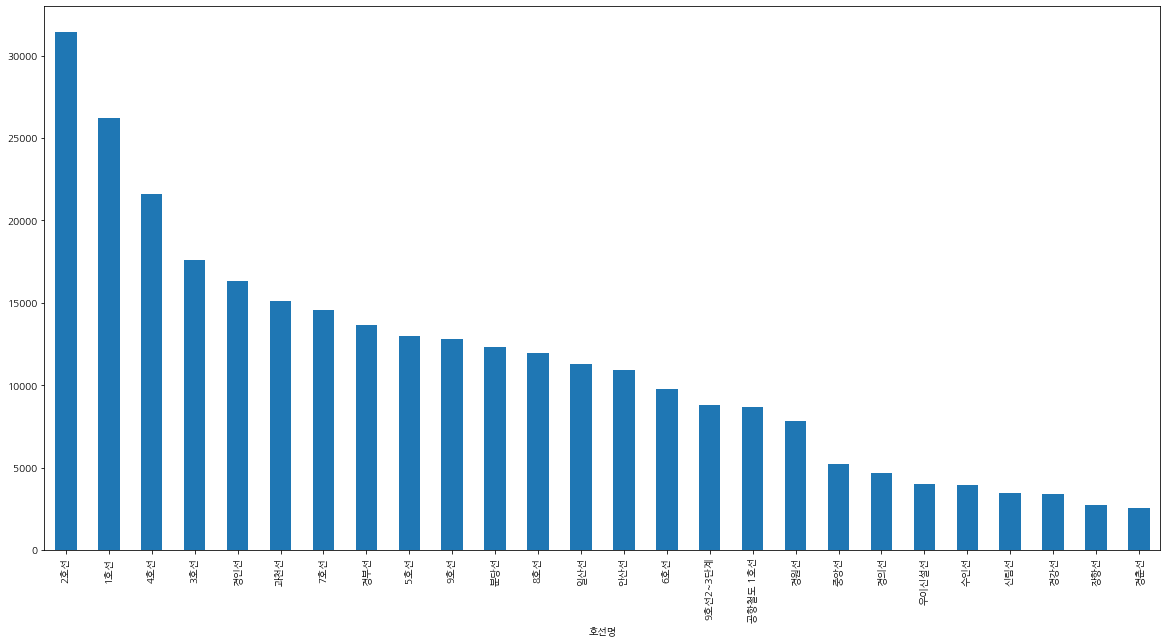

In [21]:
plt.figure(figsize=(20, 10))
metro_line.plot(kind=('bar'))
plt.show()

In [12]:
line = '2호선'
metro_st = metro_recent.groupby(['호선명', '지하철역']).mean().reset_index()
metro_st_line2 = metro_st[metro_st['호선명'] == line]
#metro_st_line2

In [16]:
metro_get_on = pd.DataFrame()
metro_get_on['지하철역'] = metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_on[metro_st_line2.columns[3+2*i]] = metro_st_line2[metro_st_line2.columns[3+2*i]]
    
metro_get_on = metro_get_on.set_index('지하철역')

#metro_get_on

In [19]:
metro_get_off = pd.DataFrame()
metro_get_off['지하철역'] = metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_off[metro_st_line2.columns[4+2*i]] = metro_st_line2[metro_st_line2.columns[4+2*i]]
    
metro_get_off = metro_get_off.set_index('지하철역')

#metro_get_off

In [25]:
df = pd.DataFrame(index = metro_st_line2['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)

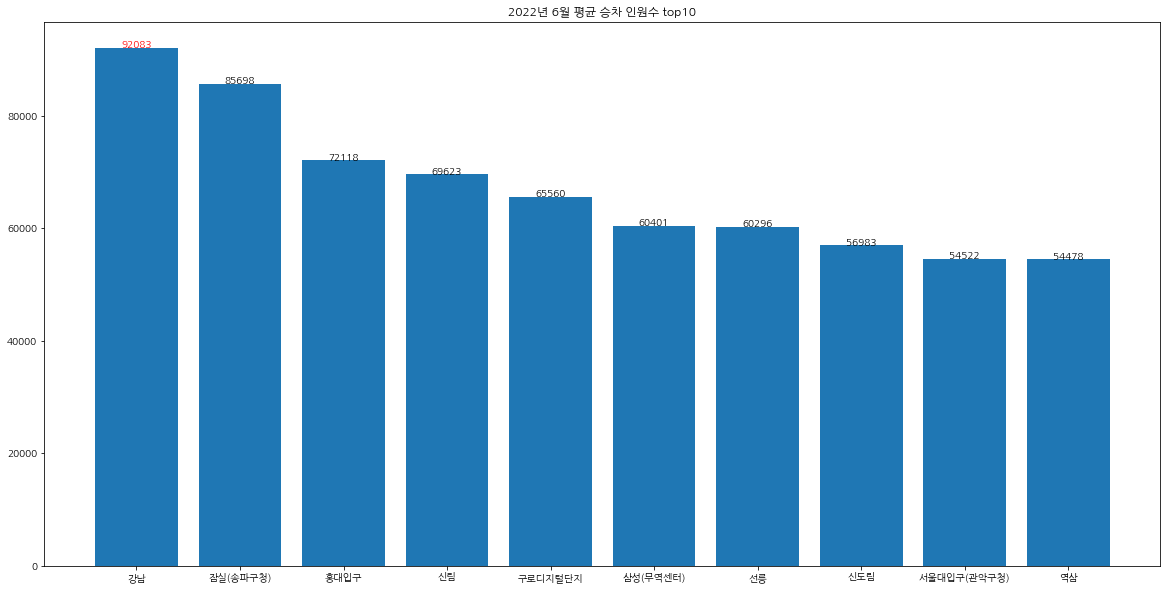

In [26]:
top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2022년 6월 평균 승차 인원수 top10')
plt.show()

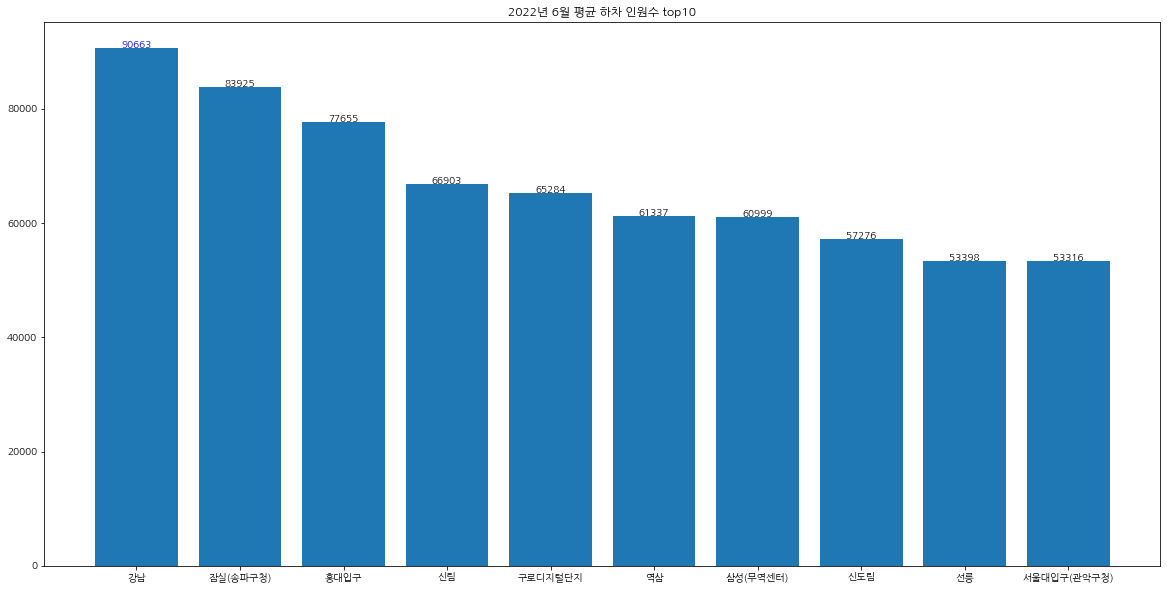

In [29]:
top10_off = df.sort_values(by='평균 하차 인원 수', ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])
for x, y in enumerate(list(top10_off['평균 하차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'blue')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2022년 6월 평균 하차 인원수 top10')
plt.show()